In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [2]:
''' leer el dataset '''
df = pd.read_csv("per-capita-plastic-waste-vs-gdp-per-capita.csv")

''' mostrar las primeras 5 filas '''
df.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [3]:
''' forma de los datos'''
df.shape

(48168, 7)

In [4]:
''' Revisar si existen valores nulos '''
df.isnull().sum()

Entity                                                     0
Code                                                    2014
Year                                                       0
Per capita plastic waste (kg/person/day)               47982
GDP per capita, PPP (constant 2011 international $)    41761
Total population (Gapminder, HYDE & UN)                 1285
Continent                                              47883
dtype: int64

In [5]:
''' Revisando porcentajes de valores nulos en cada columna '''
for column in df.columns:
    print("{} tiene {:.2f}% de valores nulos: ". format(column, (df[column].isnull().sum() / len(df)) * 100))
    print("_" * 100)

Entity tiene 0.00% de valores nulos: 
____________________________________________________________________________________________________
Code tiene 4.18% de valores nulos: 
____________________________________________________________________________________________________
Year tiene 0.00% de valores nulos: 
____________________________________________________________________________________________________
Per capita plastic waste (kg/person/day) tiene 99.61% de valores nulos: 
____________________________________________________________________________________________________
GDP per capita, PPP (constant 2011 international $) tiene 86.70% de valores nulos: 
____________________________________________________________________________________________________
Total population (Gapminder, HYDE & UN) tiene 2.67% de valores nulos: 
____________________________________________________________________________________________________
Continent tiene 99.41% de valores nulos: 
______________

In [6]:
''' info del dataset '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [7]:
''' renombra columnas '''
df.rename(columns={"GDP per capita, PPP (constant 2011 international $)": "GDP per capita en PPP",
"Total population (Gapminder, HYDE & UN)": "Poblacion Total", 
"Per capita plastic waste (kg/person/day)": "Residuos Plasticos por persona (Kg/dia)",
"Year": "Año",
"Entity": "Entidad",
"Continent": "Continente"}, inplace=True)

In [8]:
df.head()

,Entidad,Code,Año,Residuos Plasticos por persona (Kg/dia),GDP per capita en PPP,Poblacion Total,Continente
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [9]:
''' Quitar Entidades/Paises que tienen datos nulos/incompletos '''
dt_incmp_idx = df[(df["Poblacion Total"].isna()) & (df["GDP per capita en PPP"].isna())].index
df.drop(dt_incmp_idx, inplace=True)

In [10]:
df.head()

,Entidad,Code,Año,Residuos Plasticos por persona (Kg/dia),GDP per capita en PPP,Poblacion Total,Continente
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
5,Afghanistan,AFG,2006,NaN,1161.124889,26433000.0,NaN


In [11]:
df.shape

(48113, 7)

In [12]:
''' Tomar filas en donde el año == 2010'''
df_2010 = df[df["Año"] == 2010]
df_2010 = df_2010.drop(columns="Continente")

In [13]:
df_2010.head()

,Entidad,Code,Año,Residuos Plasticos por persona (Kg/dia),GDP per capita en PPP,Poblacion Total
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.069,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.144,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04


In [14]:
''' Recuperar los nombres de los continentes en donde el año == 2015 '''
df_2015 = df[df["Año"] == 2015]
df_2010["Continente"] = df_2015["Continente"].values

In [15]:
df_2015.head()

,Entidad,Code,Año,Residuos Plasticos por persona (Kg/dia),GDP per capita en PPP,Poblacion Total,Continente
14,Afghanistan,AFG,2015,NaN,1809.016488,3.441400e+07,Asia
338,Africa,NaN,2015,NaN,NaN,1.182439e+09,NaN
369,Albania,ALB,2015,NaN,10970.452245,2.891000e+06,Europe
589,Algeria,DZA,2015,NaN,13724.723853,3.972800e+07,Africa
849,American Samoa,ASM,2015,NaN,NaN,5.600000e+04,Oceania


In [16]:
''' drop filas con valores faltantes en Continente usando index '''
flt_idx = df_2010[df_2010['Continente'].isna()].index
df_2010.drop(flt_idx, inplace=True)

In [17]:
''' drop filas con valores faltantes en Residuos Plasticos por persona (Kg/dia) '''
df_2010 = df_2010[df_2010['Residuos Plasticos por persona (Kg/dia)'].notna()]
res_cap = df_2010.reset_index().drop('index', axis=1)

In [18]:
res_cap.head()

,Entidad,Code,Año,Residuos Plasticos por persona (Kg/dia),GDP per capita en PPP,Poblacion Total,Continente
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America


In [19]:
''' Leer segunda tabla '''
df2 = pd.read_csv("per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv")

In [20]:
''' vista segunda tabla '''
df2.head()

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [21]:
''' renombrar columnas '''
df2.rename(columns={"Per capita mismanaged plastic waste": "Residuos Plasticos mal gestionados por persona (kg/dia)",
                  "GDP per capita, PPP (constant 2011 international $)": "GDP per capita en PPP",
                  "Total population (Gapminder, HYDE & UN)": "Poblacion Total",
                  "Year": "Año",
                  "Entity": "Entidad"}, inplace=True)

In [22]:
''' drop columna continentes '''
df2.drop("Continent", axis=1, inplace=True)

In [23]:
''' Tomar filas en donde el año == 2010 '''
df2_2010 = df2[df2["Año"] == 2010]
df2_2010.head()

,Entidad,Code,Año,Residuos Plasticos mal gestionados por persona (kg/dia),GDP per capita en PPP,Poblacion Total
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.032,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.086,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04


In [25]:
''' drop filas con valores faltantes en Residuos Plasticos mal gestionados por persona (kg/dia) '''
df2_2010 = df2_2010[df2_2010["Residuos Plasticos mal gestionados por persona (kg/dia)"].isna() != True]

In [26]:
''' reset index '''
r_c = df2_2010.reset_index().drop("index", axis=1)

In [27]:
r_c.head()

,Entidad,Code,Año,Residuos Plasticos mal gestionados por persona (kg/dia),GDP per capita en PPP,Poblacion Total
0,Albania,ALB,2010,0.032,9927.181841,2948000.0
1,Algeria,DZA,2010,0.086,12870.602699,35977000.0
2,Angola,AGO,2010,0.045,5897.682841,23356000.0
3,Anguilla,AIA,2010,0.010,NaN,13000.0
4,Antigua and Barbuda,ATG,2010,0.051,19212.720131,88000.0


In [28]:
''' unir res_cap y r_c '''
df_residuos_plasticos = pd.merge(res_cap, r_c, how="inner")

In [29]:
''' mostrar datos '''
df_residuos_plasticos.head()

,Entidad,Code,Año,Residuos Plasticos por persona (Kg/dia),GDP per capita en PPP,Poblacion Total,Continente,Residuos Plasticos mal gestionados por persona (kg/dia)
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe,0.032
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa,0.086
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa,0.045
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America,0.010
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America,0.051


In [31]:
''' convertir las columnas a lista '''
df_residuos_plasticos.columns.tolist()

''' nombres de las columnas '''
col_nombres = ["Entidad", "Code", "Año", "Residuos Plasticos por persona (Kg/dia)", "Residuos Plasticos mal gestionados por persona (kg/dia)", 
            "GDP per capita en PPP", "Poblacion Total", "Continente"]

df_residuos_plasticos = df_residuos_plasticos[col_nombres]

''' redondear los valores por persona '''
df_residuos_plasticos.iloc[:, 3:5] = np.around(df_residuos_plasticos[["Residuos Plasticos por persona (Kg/dia)",
                                                                        "Residuos Plasticos mal gestionados por persona (kg/dia)"]], decimals=2)

''' cambiar el tipo de datos '''
df_residuos_plasticos["Poblacion Total"] = df_residuos_plasticos["Poblacion Total"].astype(int)

In [32]:
''' Generar residuos totales y residuos totales mal gestionados por pais '''
df_residuos_plasticos["Residuos Totales (Kg/año)"] = ((df_residuos_plasticos["Residuos Plasticos por persona (Kg/dia)"] *
                                                df_residuos_plasticos["Poblacion Total"]) * 365)

df_residuos_plasticos["Residuos Totales mal gestionados (Kg/año)"] = ((df_residuos_plasticos["Residuos Plasticos mal gestionados por persona (kg/dia)"] *
                                                df_residuos_plasticos["Poblacion Total"]) * 365)

In [33]:
df_residuos_plasticos.head()

,Entidad,Code,Año,Residuos Plasticos por persona (Kg/dia),Residuos Plasticos mal gestionados por persona (kg/dia),GDP per capita en PPP,Poblacion Total,Continente,Residuos Totales (Kg/año),Residuos Totales mal gestionados (Kg/año)
0,Albania,ALB,2010,0.07,0.03,9927.181841,2948000,Europe,7.532140e+07,3.228060e+07
1,Algeria,DZA,2010,0.14,0.09,12870.602699,35977000,Africa,1.838425e+09,1.181844e+09
2,Angola,AGO,2010,0.06,0.04,5897.682841,23356000,Africa,5.114964e+08,3.409976e+08
3,Anguilla,AIA,2010,0.25,0.01,NaN,13000,North America,1.186250e+06,4.745000e+04
4,Antigua and Barbuda,ATG,2010,0.66,0.05,19212.720131,88000,North America,2.119920e+07,1.606000e+06


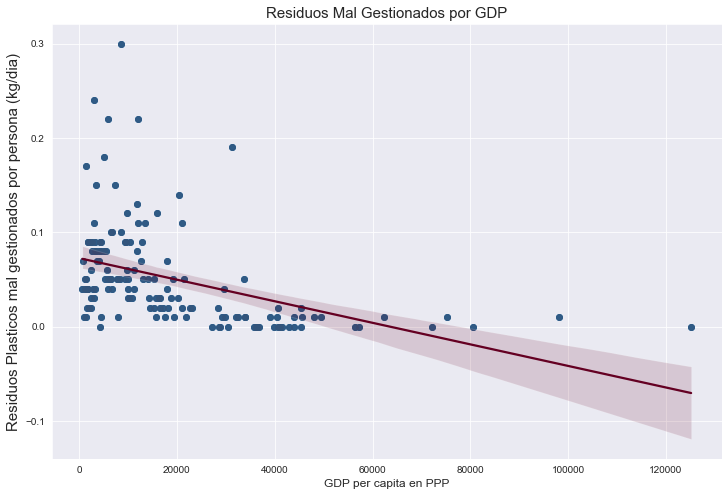

In [36]:
''' grafico de dispersion '''

plt.figure(1, figsize=(12,8))
plt.scatter(df_residuos_plasticos["GDP per capita en PPP"], df_residuos_plasticos["Residuos Plasticos mal gestionados por persona (kg/dia)"])
plt.title("Residuos Mal Gestionados por GDP", loc="center", fontsize=15)
plt.ylabel("Mala gestion Residuos", loc="center", fontsize=15)
plt.xlabel("GDP per capita", fontsize=12)

sns.regplot(x="GDP per capita en PPP", y="Residuos Plasticos mal gestionados por persona (kg/dia)", data=df_residuos_plasticos,
                scatter_kws={"color": "#34547B"}, line_kws={"color": "#640022"})

plt.show()

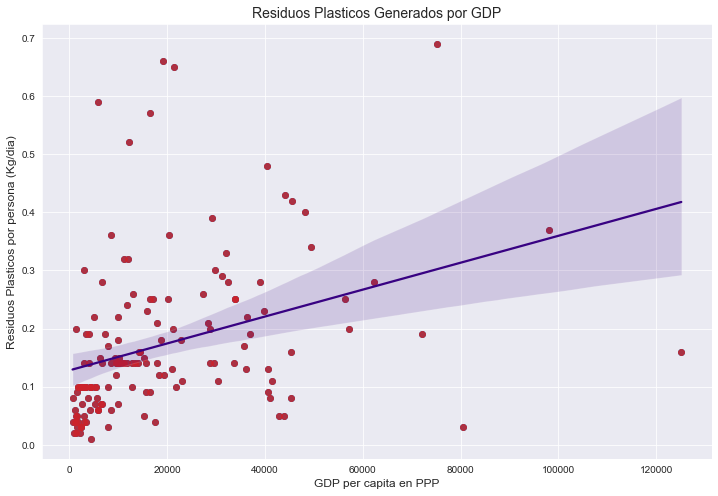

In [37]:
''' grafico de dispersion '''
plt.figure(2, figsize=(12,8))
plt.scatter(df_residuos_plasticos['GDP per capita en PPP'], df_residuos_plasticos['Residuos Plasticos por persona (Kg/dia)'])
plt.title('Residuos Plasticos Generados por GDP', loc='center', fontsize=14)
plt.ylabel('Residuos Plasticos por persona (Kg/dia)', loc='center', fontsize=12)
plt.xlabel('GDP per capita en PPP', fontsize=12)

sns.regplot(x=df_residuos_plasticos['GDP per capita en PPP'], y=df_residuos_plasticos['Residuos Plasticos por persona (Kg/dia)'],
           scatter_kws={'color': '#CD212A'}, line_kws={'color': '#380282'})

plt.show()